In [1]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import keras 
from keras import layers
import hickle as hkl
from keras.callbacks import History 
history = History()
import time

In [2]:
#load the model and dataset
dataset = hkl.load('datasetshort.hkl')
modelv4 = keras.models.load_model('model_v4.h5')
np.shape(dataset)


(12000, 6, 1000)

In [5]:
#load the test tracks
testtracks = hkl.load('testtracks.hkl')
#normalization function for the circuits
def normalizecircuit(circuit):
    jcircuit = circuit-circuit.min()
    normcircuit = jcircuit/jcircuit.max()
    return normcircuit
ntesttracks = normalizecircuit(testtracks)

In [7]:
validationtest = modelv4(ntesttracks[:,0:4])

elapsedtime:  0.01787400245666504 sec.


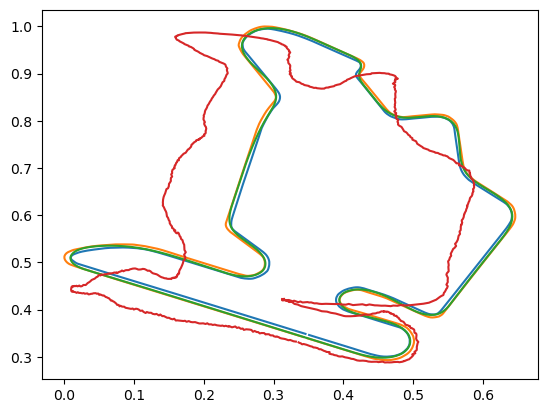

In [11]:
#check the model with the training dataset and calculate the the output time.
start = time.time()
n = 2
elapsedtrack = np.array([normalizecircuit(np.array(testtracks[n]))])
result = modelv4(elapsedtrack[:,0:4])
end = time.time()
elapsedtime = end-start
for i in [0,2,4]:
        plt.plot(elapsedtrack[0,i],elapsedtrack[0,i+1])
plt.plot(result[0,0],result[0,1])
print("elapsedtime: ",elapsedtime,"sec.")

In [14]:
#generate graphs
for n in [0,1,2,3,4]:
    start = time.time()
    elapsedtrack = np.array([normalizecircuit(np.array(testtracks[n]))])
    result = modelv4(elapsedtrack[:,0:4])
    end = time.time()
    elapsedtime = end-start
    for i in [0,2,4]:
            plt.plot(elapsedtrack[0,i],elapsedtrack[0,i+1])
    plt.plot(result[0,0],result[0,1])
    plt.savefig('results/circuit'+str(n)+'modelv4.png')
    plt.clf()
    print(elapsedtime)

0.015372753143310547
0.010441780090332031
0.008393049240112305
0.010950803756713867
0.008928775787353516


<Figure size 640x480 with 0 Axes>